# Convolutional Neural Network

### Importing the libraries 


In [3]:
import tensorflow as tf 
from keras.preprocessing.image import ImageDataGenerator

## Part 1 - Data Preprocessing (image augmentation)

### Preprocessing the training set
- _rescale_: _feature scalling_ because that's the representation range, this is a normalization 
- _shear_range_: is
- _zoom_range_ = applies zoom over the images
- _horizontal_flip_: 


In [5]:
train_datagen = ImageDataGenerator(
    rescale = 1./255, 
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)
training_set = train_datagen.flow_from_directory(
    'C:/Users/Asus/Desktop/programitas/CatDogClassifier/dataset/training_set',
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'binary')


Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    'C:/Users/Asus/Desktop/programitas/CatDogClassifier/dataset/test_set',
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN


### Initialising the CNN


In [8]:
cnn = tf.keras.models.Sequential()

### Setp 1 - Convolution

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size= 3, activation = 'relu',input_shape=[64,64,3]))

### Step 2 - Pooling

In [10]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides=2))

### Adding a second convolutional layer


In [11]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size= 3, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides=2))

### Step 3 - Flattening

In [12]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection


In [13]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer 

In [14]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN


### Compiling the CNN


In [15]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the training set an evaluation it on the test set


In [16]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25,)

Epoch 1/25
250/250 [==============================] - 40s 157ms/step - loss: 0.6733 - accuracy: 0.5791 - val_loss: 0.6317 - val_accuracy: 0.6440
Epoch 2/25
250/250 [==============================] - 39s 154ms/step - loss: 0.6084 - accuracy: 0.6687 - val_loss: 0.6730 - val_accuracy: 0.6255
Epoch 3/25
250/250 [==============================] - 38s 152ms/step - loss: 0.5744 - accuracy: 0.6994 - val_loss: 0.5429 - val_accuracy: 0.7335
Epoch 4/25
250/250 [==============================] - 38s 152ms/step - loss: 0.5371 - accuracy: 0.7304 - val_loss: 0.5084 - val_accuracy: 0.7570
Epoch 5/25
250/250 [==============================] - 38s 151ms/step - loss: 0.5010 - accuracy: 0.7487 - val_loss: 0.5132 - val_accuracy: 0.7515
Epoch 6/25
250/250 [==============================] - 39s 154ms/step - loss: 0.4933 - accuracy: 0.7545 - val_loss: 0.5474 - val_accuracy: 0.7300
Epoch 7/25
250/250 [==============================] - 38s 153ms/step - loss: 0.4640 - accuracy: 0.7766 - val_loss: 0.4661 - val_ac

## Part 4 - Making a single prediction


1/1 [==============================] - 0s 36ms/step
The prediction is dog


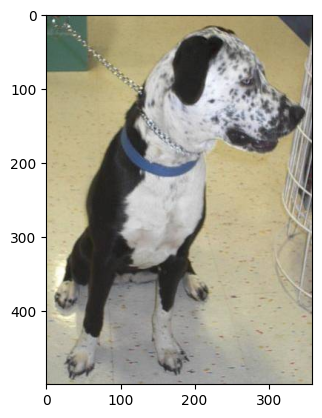

In [143]:
import numpy as np
from keras import utils
import matplotlib.pyplot as plt

cat_or_dog = ['cat','dog']
index = np.random.randint(0,2)
number = np.random.randint(4001,5001)
path = f'C:/Users/Asus/Desktop/programitas/CatDogClassifier/dataset/test_set/{cat_or_dog[index]}s/{cat_or_dog[index]}.{number}.jpg'

test_image = utils.load_img(path,target_size = (64,64))
test_image = utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

file = plt.imread(path)
plt.imshow(file)

print(f'The prediction is {prediction}')